<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

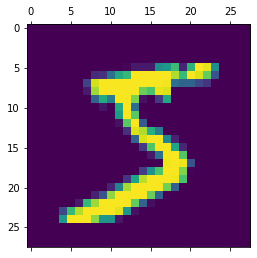

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2738 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1255 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9837


In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/train

Reusing TensorBoard on port 6006 (pid 9920), started 0:07:21 ago. (Use '!kill 9920' to kill it.)

In [13]:
%reload_ext tensorboard

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [14]:
model.get_weights()

[array([[ 0.02287038,  0.04324336, -0.07225294, ..., -0.0558374 ,
         -0.01808617, -0.05548052],
        [ 0.05944151, -0.01297788, -0.00119855, ..., -0.04334681,
          0.04549719,  0.07371394],
        [-0.04547026, -0.00024297, -0.0189109 , ..., -0.05133312,
          0.02847129,  0.05420192],
        ...,
        [ 0.02960824, -0.02619546,  0.01682969, ...,  0.03226944,
          0.04907863, -0.03729837],
        [ 0.03671205,  0.03230085, -0.01008793, ..., -0.05755843,
          0.01769134,  0.0777676 ],
        [-0.03758141,  0.01287819,  0.0139627 , ...,  0.03208465,
         -0.05415479, -0.00322922]], dtype=float32),
 array([-0.06967086,  0.12483274,  0.05393897,  0.16474055,  0.011501  ,
        -0.1738938 ,  0.09418134,  0.01916514,  0.09395308,  0.02804829,
        -0.05282057, -0.08947854, -0.11480246,  0.00916298,  0.04980734,
        -0.03905539,  0.00782039,  0.04970506,  0.06871366,  0.12783735,
        -0.05918289,  0.05650241,  0.06671742, -0.05544784,  0.104